# Spam Classification
By Lim Zi Yun


In [1]:
from numpy.random import seed
seed(1)
import tensorflow
tensorflow.random.set_seed(2)

## 1. Import Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, confusion_matrix, roc_curve, f1_score

from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


## 2. Import data
Data used is from https://archive.ics.uci.edu/ml/datasets/Spambase

In [41]:
df = pd.read_csv('spamdata.csv')
df.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


## 3. EDA
Here, we shall find out more about the data.

In [4]:
# getting row and column count
df.shape

(4601, 58)

In [5]:
# checking for missing values
df.isnull().values.any()

False

In [6]:
df.describe()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
count,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,...,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000
mean,0.104553,0.213015,0.280656,0.065425,0.312223,0.095901,0.114208,0.105295,0.090067,0.239413,...,0.038575,0.139030,0.016976,0.269071,0.075811,0.044238,5.191515,52.172789,283.289285,0.394045
std,0.305358,1.290575,0.504143,1.395151,0.672513,0.273824,0.391441,0.401071,0.278616,0.644755,...,0.243471,0.270355,0.109394,0.815672,0.245882,0.429342,31.729449,194.891310,606.347851,0.488698
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.588000,6.000000,35.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.065000,0.000000,0.000000,0.000000,0.000000,2.276000,15.000000,95.000000,0.000000
75%,0.000000,0.000000,0.420000,0.000000,0.380000,0.000000,0.000000,0.000000,0.000000,0.160000,...,0.000000,0.188000,0.000000,0.315000,0.052000,0.000000,3.706000,43.000000,266.000000,1.000000
max,4.540000,14.280000,5.100000,42.810000,10.000000,5.880000,7.270000,11.110000,5.260000,18.180000,...,4.385000,9.752000,4.081000,32.478000,6.003000,19.829000,1102.500000,9989.000000,15841.000000,1.000000


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4601 entries, 0 to 4600
Data columns (total 58 columns):
word_freq_make                4601 non-null float64
word_freq_address             4601 non-null float64
word_freq_all                 4601 non-null float64
word_freq_3d                  4601 non-null float64
word_freq_our                 4601 non-null float64
word_freq_over                4601 non-null float64
word_freq_remove              4601 non-null float64
word_freq_internet            4601 non-null float64
word_freq_order               4601 non-null float64
word_freq_mail                4601 non-null float64
word_freq_receive             4601 non-null float64
word_freq_will                4601 non-null float64
word_freq_people              4601 non-null float64
word_freq_report              4601 non-null float64
word_freq_addresses           4601 non-null float64
word_freq_free                4601 non-null float64
word_freq_business            4601 non-null float64
word_freq

In [8]:
df['spam'].value_counts()

0    2788
1    1813
Name: spam, dtype: int64

### Remove correlated columns 
- these columns are redundant

In [45]:
# Create correlation matrix of features (exclude spam column)
corr_matrix = df[:-1].corr().abs()

In [46]:
# Select upper triangle of correlation matrix
# excludes correlation of features with itself
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find features with correlation greater than 0.85
to_drop = [column for column in upper.columns if any(upper[column] > 0.85)]
to_drop

['word_freq_415']

In [10]:
# Drop features 
df.drop(to_drop, axis=1, inplace=True)

## 3. Split train and test set

In [11]:
# split train and test set (80-20 split)
train_x, test_x, train_y, test_y = train_test_split(df.drop('spam', axis=1), df['spam'], 
                                                    test_size=0.2, random_state=123)


In [12]:
print(train_x.shape, train_y.shape)
print(test_x.shape, test_y.shape)

(3680, 56) (3680,)
(921, 56) (921,)


### Scale train set using MinMaxScaler
- use the same fitted scaler to transform test set

In [13]:
# fit and transform training set
scaler = MinMaxScaler()
scaled_train_x = scaler.fit_transform(train_x)

In [14]:
# convert resulting ndarray to dataframe (for later use)
scaled_train_x = pd.DataFrame(scaled_train_x, columns = df.columns[:-1])

In [15]:
# use the fitted scaler to transform test set
scaled_test_x = scaler.transform(test_x)

In [16]:
# convert resulting ndarray to dataframe
scaled_test_x = pd.DataFrame(scaled_test_x, columns = df.columns[:-1])

In [17]:
# make sure they have the same number of rows
print(scaled_train_x.shape, train_y.shape)
print(scaled_test_x.shape, test_y.shape)

(3680, 56) (3680,)
(921, 56) (921,)


In [18]:
type(scaled_train_x)

pandas.core.frame.DataFrame

## 4. Random Forest
- train with scaled values
- in classifier, we use `class_weight='balanced'` to adjust weights, inversely proportional to class frequencies in the input data

In [19]:
# random_state: seed
model_RF = RandomForestClassifier(random_state=13, class_weight='balanced')

# fit the model on train data
model_RF.fit(scaled_train_x, train_y)

# calculate scores
scores = cross_val_score(model_RF, scaled_train_x, train_y, cv=5)
scores.mean()

0.9483695652173914

In [20]:
# test the model
predicted = model_RF.predict(scaled_test_x)
model_RF.score(scaled_test_x, test_y) # mean accuracy

0.9663409337676439

In [21]:
# get the roc auc score
probabilities = model_RF.predict_proba(scaled_test_x)
roc_auc_score(test_y, probabilities[:, 1])

0.9924958075751411

Text(0, 0.5, 'True Positive Rate')

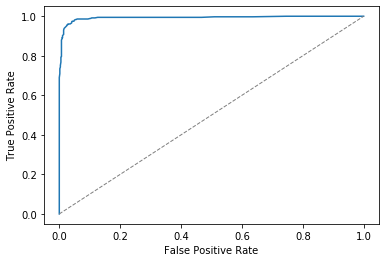

In [22]:
# plot roc curve
fpr, tpr, _ = roc_curve(test_y, probabilities[:, 1])
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], color='grey', lw=1, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

**We get pretty good results, with very high accuracy, of about 96.6%, and very high ROC score, of about 99%.**

## 5. Neural Networks
We build a fully connected neural network.

In [55]:
model_NN = Sequential()
model_NN.add(Dense(16, activation='relu')) # dense layer 1 (16 neurons)
model_NN.add(Dense(16, activation='relu')) # dense layer 2 (16 neurons)
model_NN.add(Dense(1, activation='sigmoid')) # output layer
model_NN.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

### Split train and validation set
- train set is now 60% of the whole data, validation set is 20% of the whole data, test set is 20% of the whole data

In [56]:
# split train and validation set
nn_train_x, valid_x, nn_train_y, valid_y = train_test_split(scaled_train_x, train_y, 
                                                    test_size=0.25, random_state=123)

In [57]:
# make sure they have the same number of rows
print(nn_train_x.shape, nn_train_y.shape)
print(valid_x.shape, valid_y.shape)

(2760, 56) (2760,)
(920, 56) (920,)


### Fit NN Model

In [58]:
hist = model_NN.fit(nn_train_x.values, nn_train_y.values, 
                    validation_data=(valid_x.values, valid_y.values), 
                    epochs=50, batch_size=100)

Train on 2760 samples, validate on 920 samples
Epoch 1/50
2760/2760 [==============================] - 3s 962us/step - loss: 0.6698 - accuracy: 0.6359 - val_loss: 0.6534 - val_accuracy: 0.6087
Epoch 2/50
2760/2760 [==============================] - 0s 32us/step - loss: 0.6272 - accuracy: 0.6486 - val_loss: 0.6044 - val_accuracy: 0.6674
Epoch 3/50
2760/2760 [==============================] - 0s 28us/step - loss: 0.5692 - accuracy: 0.7308 - val_loss: 0.5386 - val_accuracy: 0.7652
Epoch 4/50
2760/2760 [==============================] - 0s 23us/step - loss: 0.4985 - accuracy: 0.8047 - val_loss: 0.4649 - val_accuracy: 0.8500
Epoch 5/50
2760/2760 [==============================] - 0s 20us/step - loss: 0.4297 - accuracy: 0.8620 - val_loss: 0.3996 - val_accuracy: 0.8783
Epoch 6/50
2760/2760 [==============================] - 0s 26us/step - loss: 0.3728 - accuracy: 0.8841 - val_loss: 0.3511 - val_accuracy: 0.8815
Epoch 7/50
2760/2760 [==============================] - 0s 23us/step - loss: 0.333

### Visualise training progress
- Training and Validation Accuracy
- Training and Validation Loss

[]

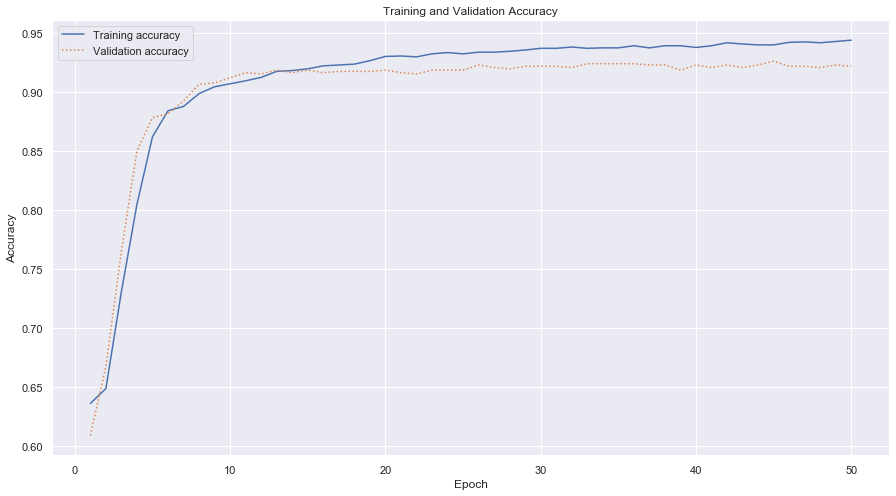

In [59]:
# visualize the changes in training and validation accuracy as training progress
%matplotlib inline

sns.set()
acc = hist.history['accuracy']
val = hist.history['val_accuracy']
epochs = range(1, len(acc) + 1)

plt.figure(figsize=(15,8))
plt.plot(epochs, acc, '-', label='Training accuracy')
plt.plot(epochs, val, ':', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')
plt.plot()

[]

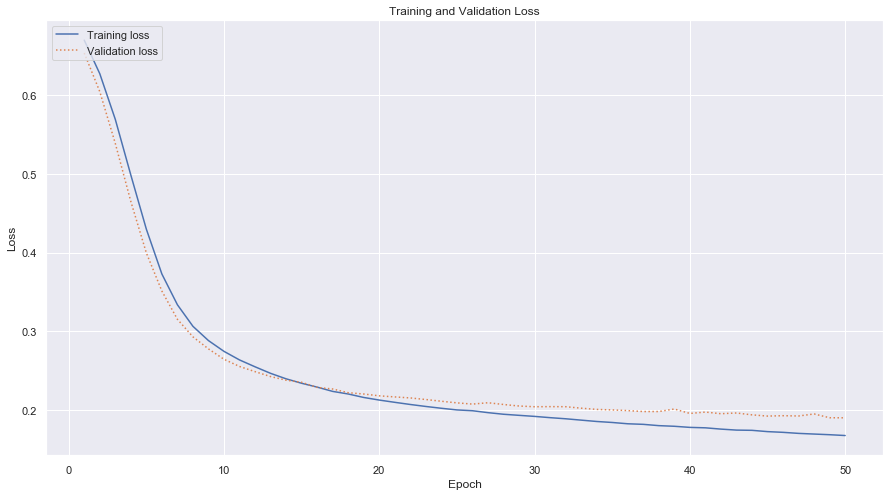

In [60]:
# visualize the changes in training and validation loss as training progress

%matplotlib inline

sns.set()
loss = hist.history['loss']
val_loss = hist.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.figure(figsize=(15,8))
plt.plot(epochs, loss, '-', label='Training loss')
plt.plot(epochs, val_loss, ':', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper left')
plt.plot()

**As the accuracy and loss for training and validation are quite close, there is not much overfitting.**


In [62]:
y_pred = model_NN.predict_classes(scaled_test_x)
confusion_matrix(test_y, y_pred)

array([[533,  30],
       [ 26, 332]])

In [71]:
f1 = f1_score(test_y, y_pred, labels=None, average='weighted')
f1

0.9392570399659882

**The confusion matrix looks good - no overprediction of one class despite the difference in number of instances in each class.**

**Since the NN model does not produce the same results each time, we shall try to run the model a few times and get the average accuracy score.**

In [72]:
test_accuracies = []
f1_scores = []

for i in range(20):
    # create NN
    model_NN = Sequential()
    model_NN.add(Dense(16, activation='relu'))
    model_NN.add(Dense(16, activation='relu'))
    model_NN.add(Dense(1, activation='sigmoid'))
    model_NN.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    # fit model
    hist = model_NN.fit(nn_train_x.values, nn_train_y.values, 
                    validation_data=(valid_x.values, valid_y.values), 
                    epochs=50, batch_size=100, verbose=0)
    
    # calculate metrics
    _, accuracy = model_NN.evaluate(scaled_test_x, test_y, verbose=0)
    f1 = f1_score(test_y, y_pred, labels=None, average='weighted')
    
    # append metrics
    test_accuracies.append(accuracy)
    f1_scores.append(f1)

In [73]:
sum(test_accuracies)/len(test_accuracies)

0.9394136726856231

In [74]:
sum(f1_scores)/len(f1_scores)

0.9392570399659878

**The mean test accuracy for the neural network is 93.9%.**